<a href="https://colab.research.google.com/github/Alan-create00/Projet-Ligue1-Match-Prediction/blob/main/notebooks/01_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊 01_EDA - Analyse exploratoire des données Ligue 1

Ce notebook explore les données brutes dans `data/raw/` afin d'identifier des patterns intéressants pour la prédiction des résultats de matchs.

## Structure
- Données : `../data/raw/`
- Résultats : exploration visuelle et statistique
- Objectifs : détecter des corrélations, patterns temporels, et influence de la valeur des joueurs

In [1]:
# 📥 Importation des bibliothèques
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import os

In [3]:
from google.colab import files

# Cette cellule te permet de téléverser manuellement les fichiers un par un
uploaded = files.upload()


Saving clubs_fr.csv to clubs_fr.csv
Saving matchs_2013_2022.csv to matchs_2013_2022.csv
Saving player_appearance.csv to player_appearance.csv
Saving player_valuation_before_season.csv to player_valuation_before_season.csv


In [4]:
# Charger les fichiers CSV une fois téléversés
matches = pd.read_csv("matchs_2013_2022.csv")
valuations = pd.read_csv("player_valuation_before_season.csv")
appearances = pd.read_csv("player_appearance.csv")
clubs = pd.read_csv("clubs_fr.csv")


In [5]:
# 🧼 Aperçu des données
print(matches.shape)
print(matches.columns)
matches.head()

(4078, 23)
Index(['Unnamed: 0', 'game_id', 'season', 'round', 'date', 'home_club_id',
       'away_club_id', 'home_club_goals', 'away_club_goals',
       'home_club_position', 'away_club_position', 'home_club_manager_name',
       'away_club_manager_name', 'stadium', 'attendance', 'referee',
       'home_club_formation', 'away_club_formation', 'home_club_name',
       'away_club_name', 'aggregate', 'competition_type', 'results'],
      dtype='object')


,Unnamed: 0,game_id,season,round,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,...,stadium,attendance,referee,home_club_formation,away_club_formation,home_club_name,away_club_name,aggregate,competition_type,results
0,12,2330874,2013,8. Matchday,2013-09-28,618,595,2,2,6.0,...,Stade Geoffroy-Guichard,31952.0,Antony Gautier,4-3-3 Attacking,4-2-3-1,AS Saint-Étienne,SC Bastia,2:2,domestic_league,0
1,13,2330880,2013,10. Matchday,2013-10-19,14171,855,1,2,16.0,...,Parc des Sports d’Annecy,8620.0,Philippe Kalt,4-4-2 double 6,4-4-2 double 6,Thonon Évian Grand Genève FC,EA Guingamp,1:2,domestic_league,-1
2,14,2330916,2013,15. Matchday,2013-11-30,1423,1082,0,1,18.0,...,Stade du Hainaut,14874.0,Bartolomeu Varela,4-4-2 double 6,4-3-1-2,Valenciennes FC,Lille Olympique Sporting Club Lille Métropole,0:1,domestic_league,-1
3,15,2331018,2013,21. Matchday,2014-01-18,273,14171,0,0,15.0,...,Roazhon Park,13391.0,Benoît Millot,4-3-3 Attacking,4-2-3-1,Stade Rennais Football Club,Thonon Évian Grand Genève FC,0:0,domestic_league,0
4,16,2331034,2013,24. Matchday,2014-02-08,1147,273,3,1,20.0,...,Stade François-Coty,5981.0,Benoît Bastien,4-1-4-1,4-3-3 Defending,AC Ajaccio,Stade Rennais Football Club,3:1,domestic_league,1


## 📅 Analyse temporelle des résultats par saison et mois

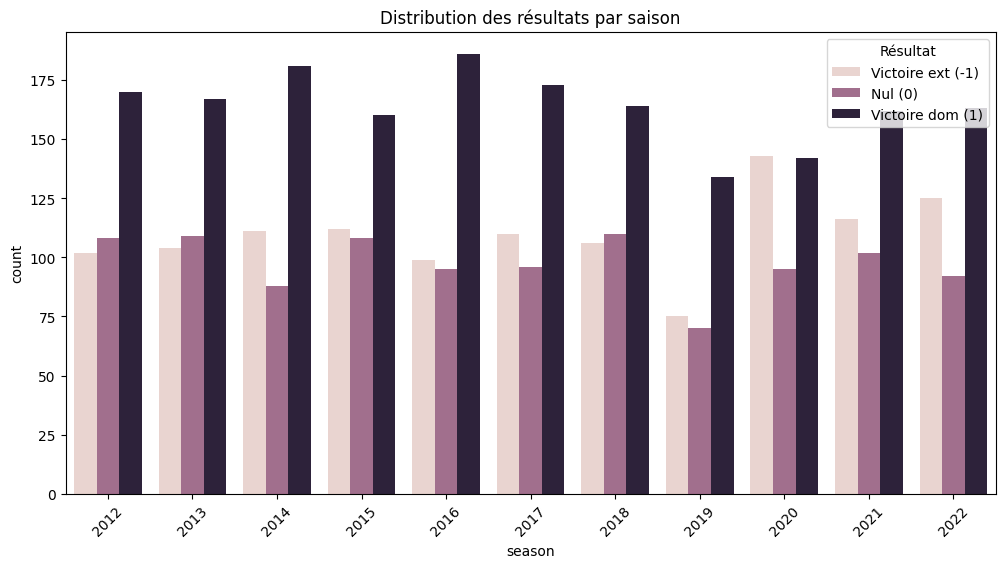

In [6]:
# Extraire année et mois
df = matches.copy()
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='season', hue='results')
plt.title('Distribution des résultats par saison')
plt.legend(title='Résultat', labels=['Victoire ext (-1)', 'Nul (0)', 'Victoire dom (1)'])
plt.xticks(rotation=45)
plt.show()

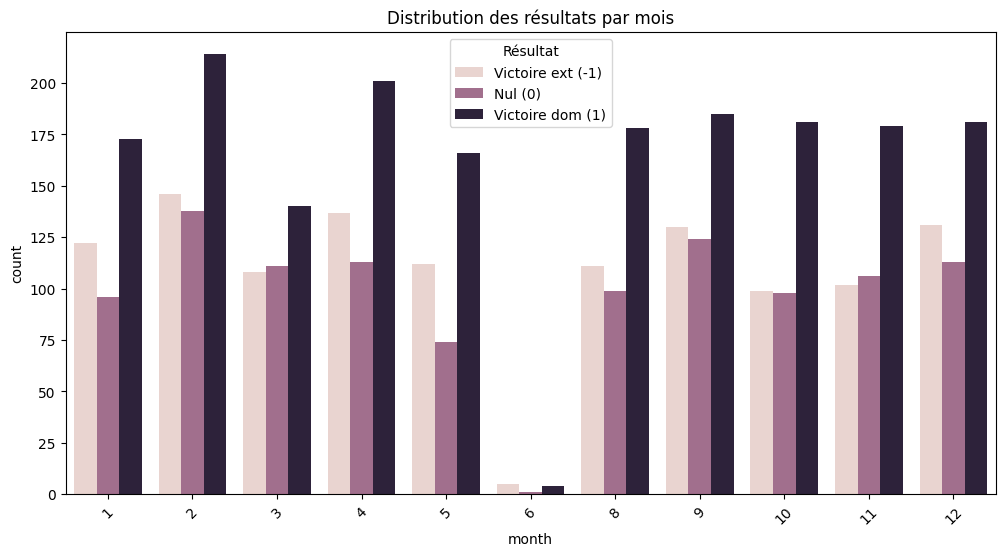

In [7]:
# Résultats par mois
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='month', hue='results')
plt.title('Distribution des résultats par mois')
plt.legend(title='Résultat', labels=['Victoire ext (-1)', 'Nul (0)', 'Victoire dom (1)'])
plt.xticks(rotation=45)
plt.show()

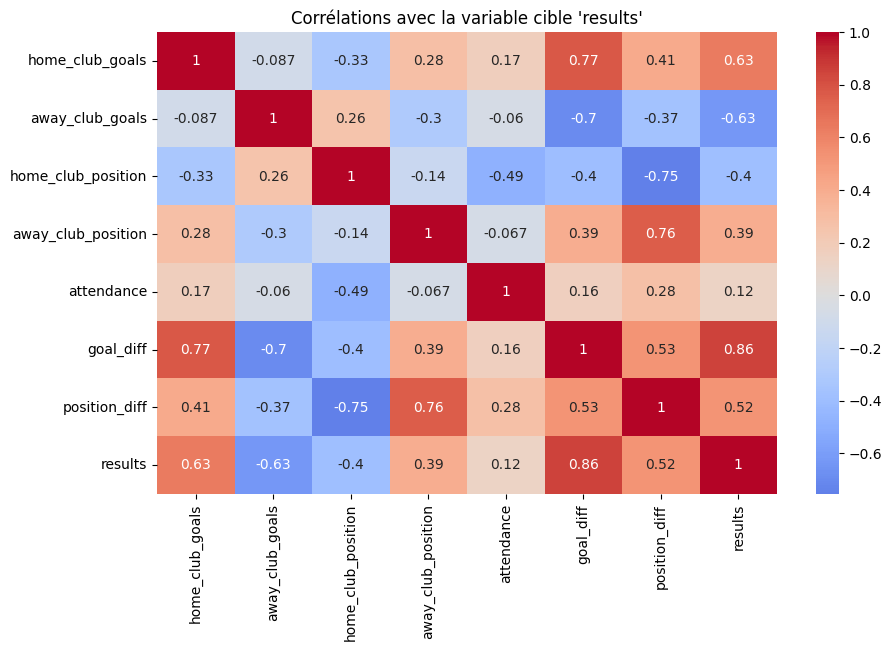

,results
results,1.000000
goal_diff,0.855620
home_club_goals,0.631402
position_diff,0.522036
away_club_position,0.392833
attendance,0.122904
home_club_position,-0.395606
away_club_goals,-0.632213


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Charger le fichier de résultats historiques
matches = pd.read_csv("matchs_2013_2022.csv")

# Préparation des variables
matches['date'] = pd.to_datetime(matches['date'])
matches['goal_diff'] = matches['home_club_goals'] - matches['away_club_goals']
matches['position_diff'] = matches['away_club_position'] - matches['home_club_position']

# Sélection des variables numériques
num_vars = [
    'home_club_goals',
    'away_club_goals',
    'home_club_position',
    'away_club_position',
    'attendance',
    'goal_diff',
    'position_diff',
    'results'  # cible
]

# Calcul de la matrice de corrélation
corr_matrix = matches[num_vars].corr()

# Affichage en heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Corrélations avec la variable cible 'results'")
plt.show()

# Top des variables les plus corrélées avec le résultat
corr_matrix['results'].sort_values(ascending=False)


## 💸 Les équipes les plus fortes économiquement gagnent-elles plus ?

In [8]:
# Valeur moyenne des joueurs par club et par an
valuations['date'] = pd.to_datetime(valuations['date'])
valuations['year'] = valuations['date'].dt.year
team_valuation = valuations.groupby(['current_club_id', 'year'])['market_value_in_eur'].mean().reset_index()
team_valuation.rename(columns={'market_value_in_eur': 'avg_market_value'}, inplace=True)
team_valuation.head()

,current_club_id,year,avg_market_value
0,40,2004,1.566667e+06
1,40,2005,2.795000e+06
2,40,2006,3.146667e+06
3,40,2007,4.160345e+06
4,40,2008,3.893548e+06


➡️ Prochaine étape : fusion avec les matchs pour relier valeur économique d’une équipe au résultat.

## 🧠 Normalisation des valeurs de joueurs
Nous testerons des méthodes comme StandardScaler, MinMaxScaler pour comparer leur impact sur les modèles.

## 🔍 Corrélations futures
Analyse de l’importance statistique de chaque variable avec les résultats (feature importance).